<a href="https://colab.research.google.com/github/christopher-ell/Deep_Learning_Begin/blob/master/4_Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


**Download the IMDB Dataset**

In [2]:
NUM_WORDS = 10000

## Load the IMDB dataset from keras standard play datasets
## Unpack the data into training and testing data and labels
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

## Turn the index version of the IMDB reviews into many one hot vectors for each word
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    ## Create a matrix of all zeros with dimensions rows equal to length of data and columns equal to number of words 
    results = np.zeros((len(sequences), dimension))
    ## Loop through each index in the sequence extracting the position (i) and the word indicie
    for i, word_indices in enumerate(sequences):
        ## Put a 1 at the vector associated with each word in the sequence for that words row
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

## Transform the training and test data from indicies to a one-hot vector for each word in the sequence
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


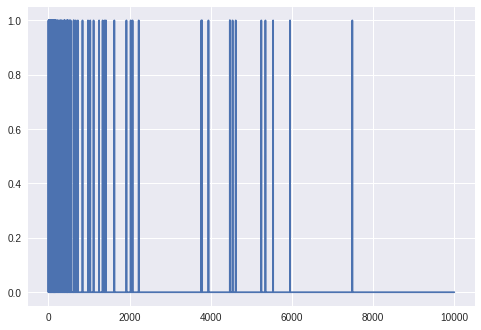

In [3]:
plt.plot(train_data[0])

**Demonstrate Overfitting**

Create a Baseline Model

In [4]:
## Set structure of baseline model sequentially by linearly stacking layers
baseline_model = keras.Sequential([
    # 'input_shape' is only required hereso that '.summary' works
    ## Start with a 16 node layer with a relu activation function
    ## Params equal to inputs (10000) x nodes (16) + nodes (16)
    keras.layers.Dense(16, activation = tf.nn.relu, input_shape=(NUM_WORDS, )),
    ## Another 16 node layer with a relu activation 
    ## Params equal to inputs (16) x nodes (16) + nodes (16)
    keras.layers.Dense(16, activation = tf.nn.relu),
    ## Finish off with a 1 node layer with a sigmoid activation function
    ## Params equal to inputs (16) x nodes (1) + nodes (1)
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

## Set how model will optimize parameters using the gradient descent algorithm 
## Adam and the loss function binary_crossentropy. Also collect accuracy and loss 
## statistics   
baseline_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy', 'binary_crossentropy'])

## Output a summary of number of model parameters and structure
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
## Train model collecting specified metrics at each epoch of training as history
## Model will run through the data (epoch) 20 times and examples will be run 
## through (batch_size) 512 at a time. Validation data will also be run
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data = (test_data, test_labels),
                                     verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5145 - acc: 0.7938 - binary_crossentropy: 0.5145 - val_loss: 0.3545 - val_acc: 0.8723 - val_binary_crossentropy: 0.3545
Epoch 2/20
 - 4s - loss: 0.2623 - acc: 0.9079 - binary_crossentropy: 0.2623 - val_loss: 0.2864 - val_acc: 0.8869 - val_binary_crossentropy: 0.2864
Epoch 3/20
 - 4s - loss: 0.1911 - acc: 0.9332 - binary_crossentropy: 0.1911 - val_loss: 0.2856 - val_acc: 0.8869 - val_binary_crossentropy: 0.2856
Epoch 4/20
 - 4s - loss: 0.1533 - acc: 0.9480 - binary_crossentropy: 0.1533 - val_loss: 0.3047 - val_acc: 0.8813 - val_binary_crossentropy: 0.3047
Epoch 5/20
 - 4s - loss: 0.1276 - acc: 0.9576 - binary_crossentropy: 0.1276 - val_loss: 0.3303 - val_acc: 0.8753 - val_binary_crossentropy: 0.3303
Epoch 6/20
 - 4s - loss: 0.1072 - acc: 0.9660 - binary_crossentropy: 0.1072 - val_loss: 0.3550 - val_acc: 0.8728 - val_binary_crossentropy: 0.3550
Epoch 7/20
 - 4s - loss: 0.0905 - acc: 0.9724 - binary_crossentropy:

Create a Smaller Model

In [6]:
## Train a smaller version of the model by stacking layers sequentially
smaller_model = keras.Sequential([
    ## Create a layer with 4 nodes and a relu activation function
    ## Params will equal inputs (10000) x nodes (4) + nodes (4)
    keras.layers.Dense(4, activation = tf.nn.relu, input_shape = (NUM_WORDS,)),
    ## Stack a layer with 4 nodes and relu activation function
    ## Params will be inputs (4) x nodes(4) + nodes (4)
    keras.layers.Dense(4, activation = tf.nn.relu),
    ## CReate a final layer with 1 nodes and sigmoid activation function, that will 
    ## turn outputs into probabilities
    ## Params will equal inputs (4) x nodes(1) + nodes(1)
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

## Set how model will optimise its parameters by using Adam optimiser and 
## binary_crossentropy loss function. Record metrics accuracy and loss
smaller_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

## Create model summary
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
## Train the model with specified train data, going over the data (batch) 20 times, 
## go through the data 512 examples at a time and use the speified validation data
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5717 - acc: 0.7742 - binary_crossentropy: 0.5717 - val_loss: 0.4672 - val_acc: 0.8467 - val_binary_crossentropy: 0.4672
Epoch 2/20
 - 3s - loss: 0.3762 - acc: 0.8831 - binary_crossentropy: 0.3762 - val_loss: 0.3562 - val_acc: 0.8750 - val_binary_crossentropy: 0.3562
Epoch 3/20
 - 3s - loss: 0.2839 - acc: 0.9068 - binary_crossentropy: 0.2839 - val_loss: 0.3095 - val_acc: 0.8840 - val_binary_crossentropy: 0.3095
Epoch 4/20
 - 3s - loss: 0.2328 - acc: 0.9218 - binary_crossentropy: 0.2328 - val_loss: 0.2907 - val_acc: 0.8866 - val_binary_crossentropy: 0.2907
Epoch 5/20
 - 4s - loss: 0.1991 - acc: 0.9335 - binary_crossentropy: 0.1991 - val_loss: 0.2856 - val_acc: 0.8858 - val_binary_crossentropy: 0.2856
Epoch 6/20
 - 4s - loss: 0.1736 - acc: 0.9413 - binary_crossentropy: 0.1736 - val_loss: 0.2845 - val_acc: 0.8858 - val_binary_crossentropy: 0.2845
Epoch 7/20
 - 4s - loss: 0.1518 - acc: 0.9510 - binary_crossentropy:

Create Bigger Model

Create a Bigger Model

In [8]:
## Create an even bigger model by sequentially stacking layers onto the network
bigger_model = keras.models.Sequential([
    ## STart with a 512 node layer with relu activation function
    ## Params equal inputs (10000) x nodes (512) + nodes (512)
    keras.layers.Dense(512, activation = tf.nn.relu, input_shape = (NUM_WORDS,)),
    ## Stack a hidden layer with 512 nodes and a relu activation function
    ## Params will equal inputs (512) x nodes (512) + nodes (512)
    keras.layers.Dense(512, activation = tf.nn.relu),
    ## Stack a final layer with 1 node and a sigmoid activation function that 
    ## will create a probability
    ## Params equals inputs(512) x nodes(1) + nodes (1)
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

## Specify how model will optimise parameters using Adam backpropagation and a
## binary_crossentropy loss function. Store metrics of accuracy and loss
bigger_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

## Generate model summary
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
## Train the model going over the data (batch) 20 times, go through 512 examples (batch size) at a time
## Also run the validation data on each epoch
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.3449 - acc: 0.8516 - binary_crossentropy: 0.3449 - val_loss: 0.2922 - val_acc: 0.8815 - val_binary_crossentropy: 0.2922
Epoch 2/20
 - 19s - loss: 0.1325 - acc: 0.9524 - binary_crossentropy: 0.1325 - val_loss: 0.3639 - val_acc: 0.8618 - val_binary_crossentropy: 0.3639
Epoch 3/20
 - 18s - loss: 0.0404 - acc: 0.9883 - binary_crossentropy: 0.0404 - val_loss: 0.4477 - val_acc: 0.8676 - val_binary_crossentropy: 0.4477
Epoch 4/20
 - 18s - loss: 0.0059 - acc: 0.9994 - binary_crossentropy: 0.0059 - val_loss: 0.6133 - val_acc: 0.8691 - val_binary_crossentropy: 0.6133
Epoch 5/20
 - 19s - loss: 7.1316e-04 - acc: 1.0000 - binary_crossentropy: 7.1316e-04 - val_loss: 0.7029 - val_acc: 0.8708 - val_binary_crossentropy: 0.7029
Epoch 6/20
 - 19s - loss: 7.7153e-04 - acc: 1.0000 - binary_crossentropy: 7.7153e-04 - val_loss: 0.7292 - val_acc: 0.8704 - val_binary_crossentropy: 0.7292
Epoch 7/20
 - 19s - loss: 1.3647e-04 - acc: 1.

Plot the Training and Validation Loss

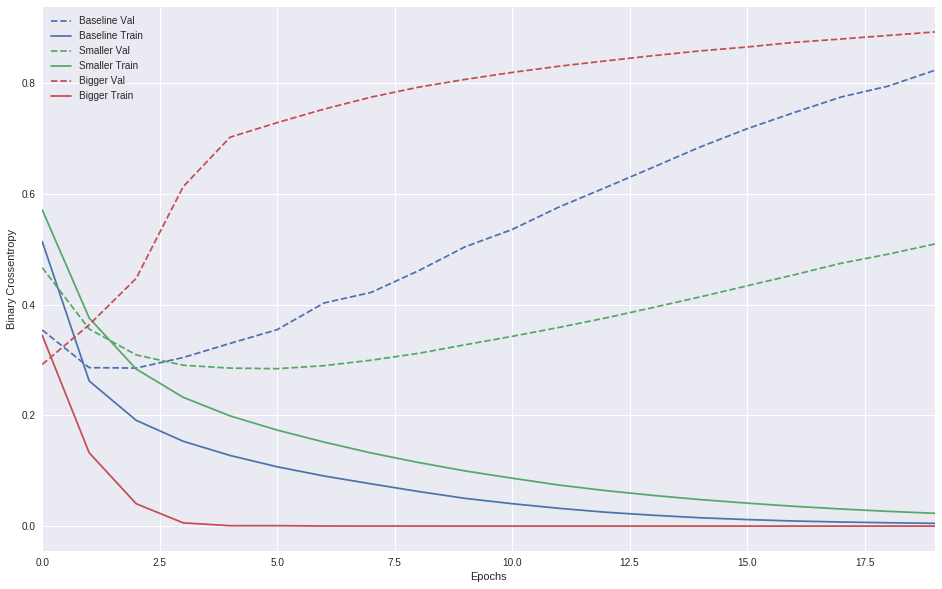

In [10]:
## Create a function to plot the loss and accuracy metrics picked up over training
## for both training and validation data
def plot_history(histories, key = 'binary_crossentropy'):
  ## Create a frame for the figure
  plt.figure(figsize = (16, 10))
  
  ## Loop through the validation data histories in the three different trained models.
  for name, history in histories:
    ## Create the validation data plot, plot it with a dotted line and the val name 
    ## attached to model name
    val = plt.plot(history.epoch, history.history['val_'+key], 
                   '--', label = name.title()+' Val')
    
    ## Create the training data plot, plot it with solid line and the Train name 
    ## attached to the model name
    plt.plot(history.epoch, history.history[key], color = val[0].get_color(),
            label = name.title()+' Train')
    
  ## Create the x label epochs
  plt.xlabel('Epochs')
  ## Create the y-label the loss function used
  plt.ylabel(key.replace('_', ' ').title())
  ## Attache legend
  plt.legend()
  
  ## Set the maximum of the x-axis as the total number of epochs
  plt.xlim([0, max(history.epoch)])
  
## Run the above function to plot the data of each of the baseline, small and big models
## Create a list of tuple with each tuple containing the model name and data
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

The above graph shows that create a more complex model (more parameters) can increase the accuracy of the model lowering both the training and validation error by capturing more signals in the data . However having too many parameters (overfitting) can also create problems capturing spurious signals and so it fits the training data very well, but then doesn't fit the validation data as well due to spurious signals not being found in unseen data

**Strategies**

Add Weight Regularization

In [15]:
## Build a new version of the baseline model with regularisation parameters
## One way to "simplify" a model and mitigate overfitting is by forcing its 
## parameters to take on smaller values, making the distribution of the 
## parameters more regular, this is called regularisation.
## There are two types of regularisation:
##   - L1 Where the cost added is proportional to the absolute value of the 
##     weighted coefficients
##   - L2 Where the cost added is proportional to the square of the coefficients
##      Also called weight decay in neural networks
l2_model = keras.models.Sequential([
    ## Create layer with 16 nodes and an L2 regulariser with a parameter of 
    ## 0.0001. The activation function for the layer is relu.
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001), 
                      activation = tf.nn.relu, input_shape = (NUM_WORDS,)), 
    ## Ceate layer with 16 nodes and l2 regularisaer with parameter of 0.0001.
    ## The activation function is relu
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                       activation = tf.nn.relu),
    ## Create layer with sigmoid activation function, allowing it to generate 
    ## probability
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

## compile model, specifying how gradient descent will optimise the parameters
## adam will be the gradient descent algorithm, using a loss function of 
## binary_crossentropy. It will collect metrics of accuracy and loss during
## training
l2_model.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy',
                metrics = ['accuracy', 'binary_crossentropy'])

## Train the model as well as collecting the historical metrics. 
## Specify the training data and labels to use, the model will run for 20 
## epochs, will run 512 examples at a time and run the validation on test data
l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs = 20,
                               batch_size = 512,
                               validation_data = (test_data, test_labels),
                               verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20


KeyboardInterrupt: ignored

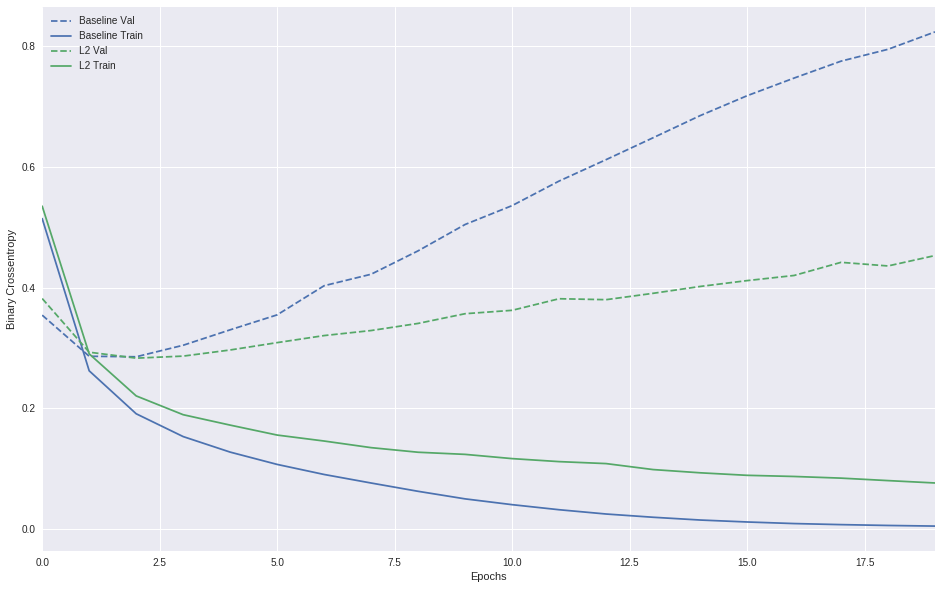

In [12]:
## Plot the training of the baseline and l2 data by epoch
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

It can be seen that although the baseline model performs better on the training data it doesn't perform as well on the validation data which is out of sample. 

Add Dropout

In [13]:
## Dropout consists of randomly selecting a number of the activation layers cells
## and setting them to zero
dpt_model = keras.models.Sequential([
    ## Stack a layer with 16 nodes and a relu activation function
    keras.layers.Dense(16, activation = tf.nn.relu, input_shape = (NUM_WORDS,)),
    ## drop out half of the cells in the activation layer
    keras.layers.Dropout(0.5),
    ## Stack another layer with 16 nodes and a relu function
    keras.layers.Dense(16, activation = tf.nn.relu),
    ## Drop out half the activation cells 
    keras.layers.Dropout(0.5),
    ## Stack a final layer with 1 node and a sigmoid activation function
    keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

## 
dpt_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, 
                                  epochs = 20, 
                                 batch_size = 512,
                                 validation_data = (test_data, test_labels),
                                 verbose = 2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6187 - acc: 0.6523 - binary_crossentropy: 0.6187 - val_loss: 0.4803 - val_acc: 0.8519 - val_binary_crossentropy: 0.4803
Epoch 2/20
 - 4s - loss: 0.4616 - acc: 0.8060 - binary_crossentropy: 0.4616 - val_loss: 0.3574 - val_acc: 0.8808 - val_binary_crossentropy: 0.3574
Epoch 3/20
 - 4s - loss: 0.3683 - acc: 0.8602 - binary_crossentropy: 0.3683 - val_loss: 0.2992 - val_acc: 0.8872 - val_binary_crossentropy: 0.2992
Epoch 4/20
 - 4s - loss: 0.3003 - acc: 0.8944 - binary_crossentropy: 0.3003 - val_loss: 0.2800 - val_acc: 0.8862 - val_binary_crossentropy: 0.2800
Epoch 5/20
 - 4s - loss: 0.2523 - acc: 0.9131 - binary_crossentropy: 0.2523 - val_loss: 0.2789 - val_acc: 0.8874 - val_binary_crossentropy: 0.2789
Epoch 6/20
 - 4s - loss: 0.2160 - acc: 0.9263 - binary_crossentropy: 0.2160 - val_loss: 0.2869 - val_acc: 0.8869 - val_binary_crossentropy: 0.2869
Epoch 7/20
 - 4s - loss: 0.1868 - acc: 0.9371 - binary_crossentropy:

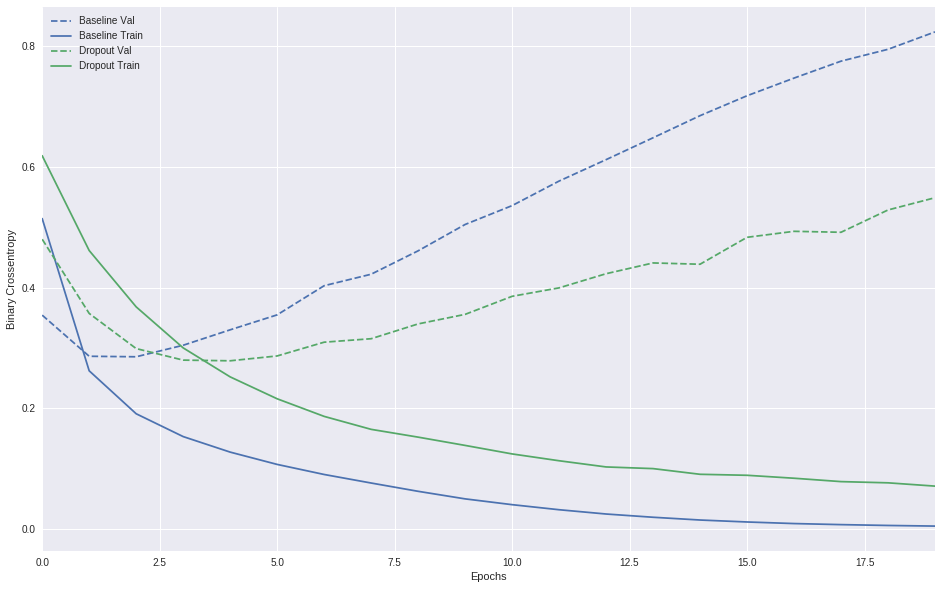

In [14]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])